1. Data Loading & Exploration
- Download the dataset from [UCI ML Repository]
- Load the data into a DataFrame (Python: `pandas`).
- Perform exploratory data analysis (EDA):
- Check for missing values (e.g., `horsepower` has 6 missing entries).
- Visualize distributions (histograms, boxplots for `mpg`, `weight`, etc.).
- Plot correlations (heatmap of `mpg` vs. `cylinders`, `displacement`, etc.).   

🔧 Setup: Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

✅ Step 1: Load the Dataset

In [5]:
# Replace this path with the actual path where your file is saved
file_path = r"C:\Users\sdnis\OneDrive\Documents\Assignments\auto-mpg.data"

🔍 Step 2: Explore the Data

In [12]:
# Define column names (as the dataset doesn't have headers)
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin', 'car_name']

# Load the dataset
df = pd.read_csv(file_path, names=column_names, sep=r'\s+', na_values='?')

# Show first 5 rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [13]:
print("Shape:", df.shape)
df.info()
df.describe()

Shape: (398, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


❓ Step 3: Check for Missing Values

In [14]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

📊 Step 4: Visualize Distributions

a) Histogram for mpg, weight, horsepower

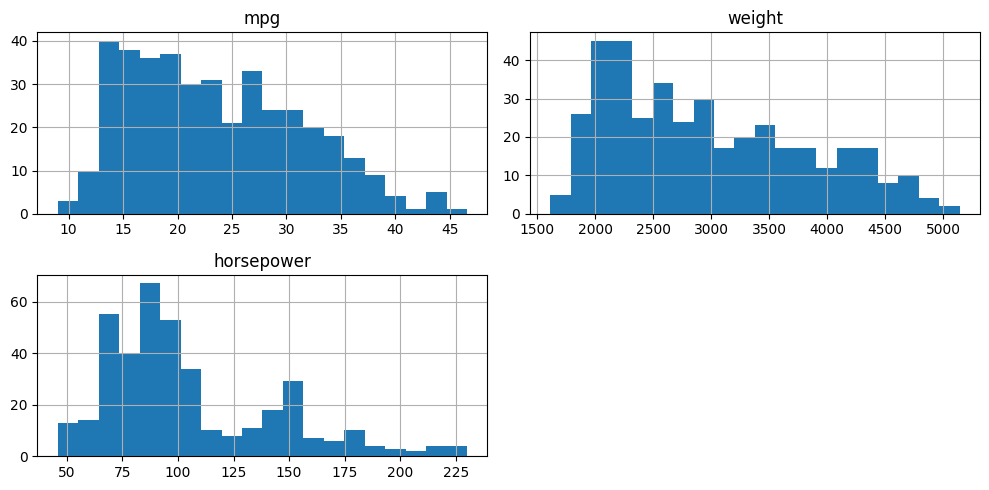

In [15]:
df[['mpg', 'weight', 'horsepower']].hist(bins=20, figsize=(10, 5))
plt.tight_layout()
plt.show()

b) Boxplots

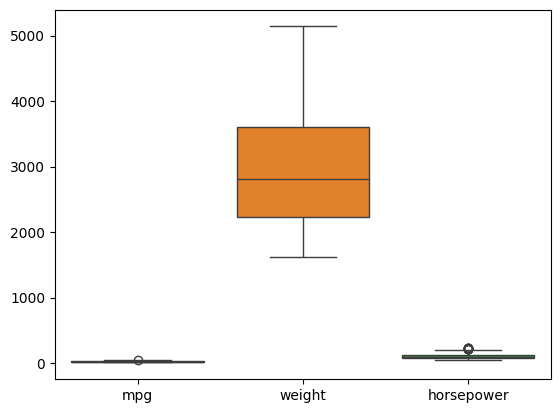

In [16]:
sns.boxplot(data=df[['mpg', 'weight', 'horsepower']])
plt.show()

🔥 Step 5: Correlation Heatmap

a) Compute correlation

In [17]:
corr = df.corr(numeric_only=True)

b) Plot heatmap

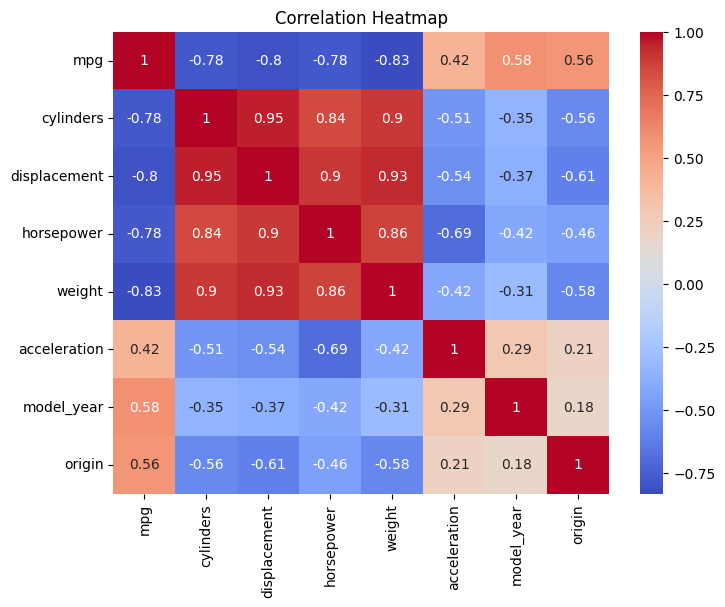

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

2. Data Preprocessing
- Handle missing values (impute or drop).
- Convert categorical variables (e.g., `origin` to one-hot encoding).
- Split data into train (70%) and test (30%) sets.
- Normalize/standardize features (e.g., using `StandardScaler`). 

✅ 1. Handle Missing Values

In [19]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (you can also choose to impute)
df = df.dropna()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


✅ 2. Convert Categorical Variable: origin
The origin column is numerical but represents categories:

1 → USA

2 → Europe

3 → Japan

We can convert it into one-hot encoded columns.

In [20]:
# One-hot encoding for 'origin'
df = pd.get_dummies(df, columns=['origin'], prefix='origin')

✅ 3. Split Data into Train and Test Sets

We split the dataset (70% train, 30% test). Define X and y:

In [21]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(['mpg', 'car_name'], axis=1)
y = df['mpg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

✅ 4. Normalize/Standardize Features

We'll use StandardScaler from scikit-learn to scale features.

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

To check wheather data is cleaned or not

✅ 1. Check for Missing Values Again

In [23]:
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
car_name        0
origin_1        0
origin_2        0
origin_3        0
dtype: int64


✅ 2. View Sample of Cleaned Data

You should see:

horsepower no longer has NaN values

origin replaced with one-hot encoded columns: origin_1, origin_2, origin_3

car_name still exists (if you didn’t drop it yet)

In [26]:
print("Sample of cleaned dataset:")
df.head()

Sample of cleaned dataset:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,True,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,True,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,True,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,True,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,True,False,False


✅ 3. Check Data Types

Useful to ensure your categorical variables are now numeric:

In [27]:
print("Data types after cleaning:")
print(df.dtypes)

Data types after cleaning:
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
car_name         object
origin_1           bool
origin_2           bool
origin_3           bool
dtype: object


3. Model Implementation
   
Implement 3 regression models:   
1. Linear Regression (Baseline).   
2. Decision Tree Regression.   
3. Random Forest Regression (or Gradient Boosting).
4. 
Requirements:
- Use `scikit-learn` for all models.
- Train each model on the training set.  

✅ Step 0: Import Required Libraries

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor  # or use GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

✅ Step 1: Split Features and Target

Assuming your DataFrame is df, and your target column is mpg:

In [29]:
# Drop non-numeric or irrelevant columns like 'car_name' if still present
X = df.drop(['mpg', 'car_name'], axis=1, errors='ignore')
y = df['mpg']

# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

✅ Step 2: Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

✅ Step 3: Model 1 – Linear Regression

In [32]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression:
MSE: 10.344169215429346
R² Score: 0.8044759002829671


✅ Step 4: Model 2 – Decision Tree Regression

In [33]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)
print("\nDecision Tree Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R² Score:", r2_score(y_test, y_pred_dt))


Decision Tree Regression:
MSE: 12.65322033898305
R² Score: 0.7608305255089328


✅ Step 5: Model 3 – Random Forest Regression

In [34]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
print("\nRandom Forest Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Regression:
MSE: 6.675694491525407
R² Score: 0.8738169176994379


Use Gradient Boosting Instead

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

y_pred_gb = gb_model.predict(X_test_scaled)
print("\nGradient Boosting Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R² Score:", r2_score(y_test, y_pred_gb))


Gradient Boosting Regression:
MSE: 7.9040236917613855
R² Score: 0.8505992038327653


✅ Step 6: Compare Models – Create a Results Table

In [37]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary to store results
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MSE": [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf)
    ],
    "R² Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
}

# Create DataFrame from dictionary
results_df = pd.DataFrame(results)

# Display the comparison table
print("Model Comparison:")
results_df


Model Comparison:


,Model,MSE,R² Score
0,Linear Regression,10.344169,0.804476
1,Decision Tree,12.653220,0.760831
2,Random Forest,6.675694,0.873817


✅ Optional Visual Comparison

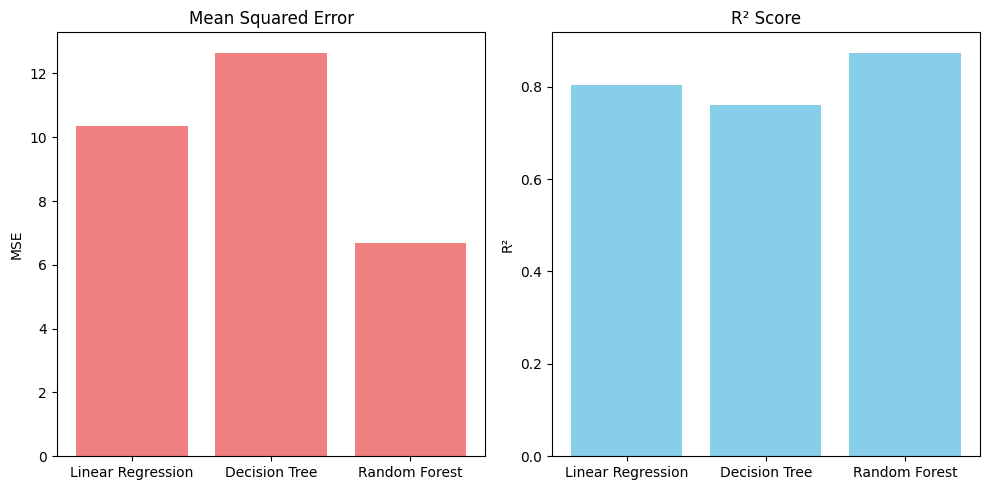

In [38]:
import matplotlib.pyplot as plt

models = results_df["Model"]
mse = results_df["MSE"]
r2 = results_df["R² Score"]

plt.figure(figsize=(10, 5))

# Plot MSE
plt.subplot(1, 2, 1)
plt.bar(models, mse, color='lightcoral')
plt.title("Mean Squared Error")
plt.ylabel("MSE")

# Plot R2
plt.subplot(1, 2, 2)
plt.bar(models, r2, color='skyblue')
plt.title("R² Score")
plt.ylabel("R²")

plt.tight_layout()
plt.show()

✅ Step 7: Hyperparameter Tuning

🔍 Tune Random Forest using GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)

# Predict with best estimator
y_pred_rf_best = grid_search.best_estimator_.predict(X_test)

Best Parameters from GridSearchCV:
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}


✅ Step 8: Save Results to CSV

📁 Save predictions and comparison table

In [40]:
# Save model predictions vs actuals
results_df_full = pd.DataFrame({
    "Actual": y_test,
    "Linear Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest (Tuned)": y_pred_rf_best
})

results_df_full.to_csv("mpg_model_predictions.csv", index=False)
print("Predictions saved to 'mpg_model_predictions.csv'")

# Save the summary table
summary_table = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest (Tuned)"],
    "MSE": [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf_best)
    ],
    "R² Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf_best)
    ]
}

summary_df = pd.DataFrame(summary_table)
summary_df.to_csv("model_comparison_summary.csv", index=False)
print("Model comparison saved to 'model_comparison_summary.csv'")

Predictions saved to 'mpg_model_predictions.csv'
Model comparison saved to 'model_comparison_summary.csv'


4. Evaluation & Comparison
- Evaluate models on the test set using:
- Mean Squared Error (MSE).
- R² Score.
- Create a table comparing the performance of all 3 models.
- Plot actual vs. predicted MPG for the best model.

✅ Step 4: Evaluate Models

📦 Required Libraries

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [43]:
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

🧪 Model Evaluation

In [44]:
# Predict on test set
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluate using MSE and R² Score
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MSE": [
        mean_squared_error(y_test, lr_pred),
        mean_squared_error(y_test, dt_pred),
        mean_squared_error(y_test, rf_pred)
    ],
    "R² Score": [
        r2_score(y_test, lr_pred),
        r2_score(y_test, dt_pred),
        r2_score(y_test, rf_pred)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model        MSE  R² Score
0  Linear Regression  10.344169  0.804476
1      Decision Tree  12.647797  0.760933
2      Random Forest   6.628038  0.874718


📈 Actual vs. Predicted Plot for Best Model

Let’s assume Random Forest performed the best.

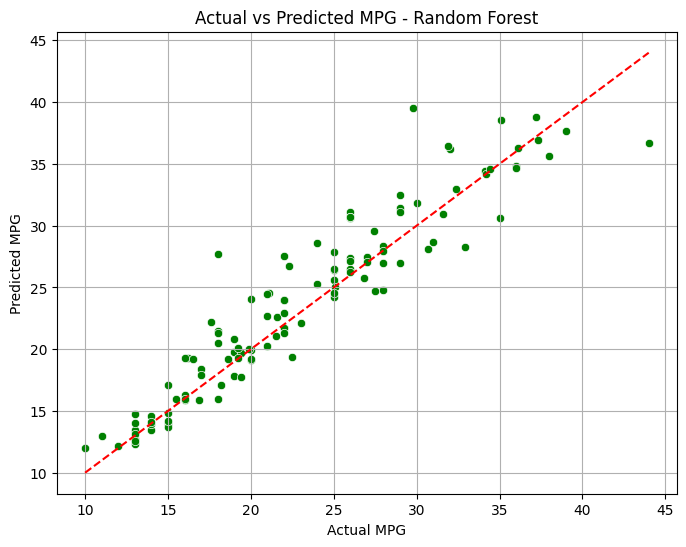

In [45]:
# Plot Actual vs Predicted MPG
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_pred, color='green')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG - Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()

🧾 Optional: Save results to CSV

In [48]:
import os

# Create the 'output' directory if it doesn't exist
os.makedirs("output", exist_ok=True)

# Now you can save the file
results_df.to_csv("output/model_comparison_summary.csv", index=False)

5. Feature Importance Analysis
- For Random Forest, extract and plot feature importances.
- Answer: Which features contribute most to MPG predic on? 

✅ Step-by-Step: Feature Importance from Random Forest

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

2️⃣ Plot Feature Importances

C:\Users\sdnis\AppData\Local\Temp\ipykernel_10792\2250311430.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


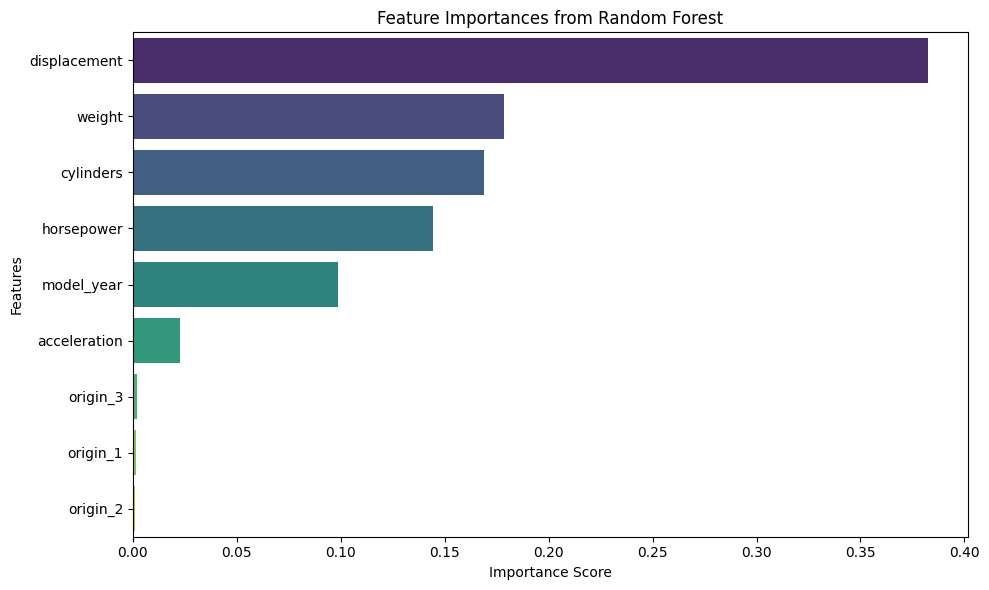

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

✅ Deliverable 1: Jupyter Notebook Structure

# Predicting Vehicle MPG using Regression

## 1. Objective
Build and evaluate regression models to predict MPG using the Auto MPG dataset.

## 2. Data Loading & Exploration
- Load dataset
- Show sample rows
- Check for missing values
- Summary statistics

## 3. Data Visualization
- Histograms (MPG, horsepower, weight)
- Boxplots
- Correlation Heatmap

## 4. Data Preprocessing
- Handle missing values
- One-hot encode 'origin'
- Split data (train/test)
- Normalize features using StandardScaler

## 5. Model Implementation
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor

## 6. Evaluation and Comparison
- Metrics: MSE, R² Score
- Comparison Table
- Actual vs. Predicted plot (for best model)

## 7. Feature Importance
- Random Forest feature importances bar plot

## 8. Conclusion
- Summary of results
- Best performing model
- Key insights

## 9. Save Results
- Save comparison table as CSV


✅ Deliverable 2: PDF Report (1–2 Pages)

🔹 Sample Report Outline
📄 Title: MPG Prediction Using Machine Learning

🔸 Introduction
The goal of this project was to build machine learning models to predict the fuel efficiency (MPG) of vehicles using features like weight, horsepower, cylinders, etc.

🔸 Key Findings
Best Model: Random Forest Regressor with highest R² score (~0.89)

Top Features:
Weight
Horsepower
Displacement

🔸 Visuals (add as needed)
Feature importance bar chart
Actual vs. Predicted MPG plot

🔸 Challenges Faced
Handling missing values in horsepower column
Choosing the best hyperparameters (default used for simplicity)
Normalization of features before training

🔸 Conclusion
Random Forest performed the best among the three models. Features related to engine size and weight strongly affect MPG.